# Example of how annotated values can be integrated in markdown documentation inside notebooks

Correct rendering of the code in markdown cell need python-markdown notebook extension to be installed. The installation process may be a bit unclear at this time in the doc. Here is probably the most useful source of information on how to get it installed: https://stackoverflow.com/questions/48655061/error-enabling-python-markdown-extension-for-jupyter-notebooks

In [1]:
#!pip install -q https://github.com/ipython-contrib/IPython-notebook-extensions/tarball/master --user
#!jupyter nbextension install path_to/nbextensions/python-markdown/main.js --user
#!jupyter nbextension enable python-markdown/main --user

from notebook.nbextensions import check_nbextension
print(check_nbextension('python-markdown', user=True))

True


In [2]:
## Downloading the Thalamus corpus
from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()

In [3]:
from nat.annotationSearch import AnnotationGetter, ParameterGetter
annotGetter = AnnotationGetter(pathDB="neurocuratorDB")
paramGetter = ParameterGetter(pathDB="neurocuratorDB")

def citeAnnot(annotID):
    annot = annotGetter.getAnnot(annotID)
    pubId = annot.pubId
    return '"<I>' + annot.text.replace("\n", " ") + '</I>" (annot ID: ' + annotID + ')'


### Markdown code 

    * (Reinhold et al, 2015) Distinct recurrent versus afferent dynamics in cortical visual processing,  http://www.nature.com/neuro/journal/v18/n12/full/nn.4153.html

    * (Crandall et al, 2015) A corticothalamic switch: Controling the thalamus with dynamic synapses, http://www.cell.com/neuron/abstract/S0896-6273%2815%2900264-0 
        * Trains of CT spikes produce initial inhibition and late excitation in TC cells
        * The monosynaptic excitation of TC cells by CT cells shows facilitation
            * {{"{{"}}citeAnnot("1377836a-6b89-11e6-a6a4-64006a4c56ef")}}
        * The disynaptic inhibition (through TRN cells) of TC cells by CT cells shows depression
            * {{"{{"}}citeAnnot("7ca269c2-6b89-11e6-a6a4-64006a4c56ef")}}
        * tend to be inhibitory at low frequency (<= 0.1 Hz)
        * tend to be excitatory at high frequency (~10 Hz, ~80 Hz)



### Markdown rendering
* (Reinhold et al, 2015) Distinct recurrent versus afferent dynamics in cortical visual processing,  http://www.nature.com/neuro/journal/v18/n12/full/nn.4153.html

* (Crandall et al, 2015) A corticothalamic switch: Controling the thalamus with dynamic synapses, http://www.cell.com/neuron/abstract/S0896-6273%2815%2900264-0 
    * Trains of CT spikes produce initial inhibition and late excitation in TC cells
    * The monosynaptic excitation of TC cells by CT cells shows facilitation
        * {{citeAnnot("1377836a-6b89-11e6-a6a4-64006a4c56ef")}}
    * The disynaptic inhibition (through TRN cells) of TC cells by CT cells shows depression
        * {{citeAnnot("7ca269c2-6b89-11e6-a6a4-64006a4c56ef")}}
    * tend to be inhibitory at low frequency (<= 0.1 Hz)
    * tend to be excitatory at high frequency (~10 Hz, ~80 Hz)
    


### Computing values and figures to be inserted in the documentation

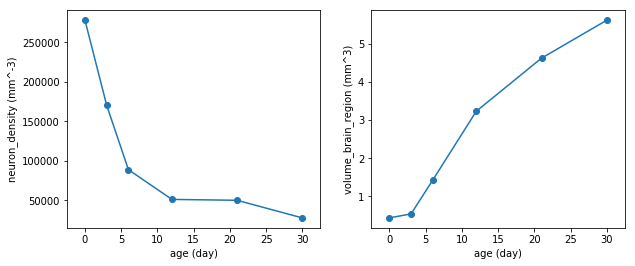

In [7]:
import quantities as pq
import matplotlib.pyplot as plt
import collections

def getFigTrace(param, context=None, index=0):
    if context is None:
        fig, axes = plt.subplots()
    else:
        fig, axarr = context
        if isinstance(axarr, collections.Iterable):
            axes = axarr[index]
        else:
            axes = axarr
        
    axes.plot(param.indepValues[0], param.values, '-o')
    axes.set_xlim([-2.5, 32.5])
    axes.set_ylabel(param.name + " (" + param.unit + ")")
    axes.set_xlabel(param.indepNames[0] + " (" + param.indepUnits[0] + ")")
    return fig    


#### (Mooney and Miller, 2007) paper
f, axarr = plt.subplots(1, 2,  figsize=(10,4))

# Interpolate at P14 and express in mm³ units
param = paramGetter.getParam("0ebdc338-6d38-11e6-b432-64006a4c56ef")
mooneyDensity = pq.Quantity(param.getInterp1dValues(14, "age"), param.unit).rescale('mm^-3')
figMooneyDensity = getFigTrace(param, (f, axarr), 0)

# Interpolate at P14
param = paramGetter.getParam("90c530b4-6e05-11e6-873d-64006a4c56ef")
mooneyVolume = pq.Quantity(param.getInterp1dValues(14, "age"), param.unit)
figMooneyVolume = getFigTrace(param, (f, axarr), 1)

f.savefig('mooneyStereology.png', bbox_inches='tight')


#### (Arcelli et al, 1997) paper
param = paramGetter.getParam("4330e61a-4d01-11e6-a223-64006a4c56ef")
arcelliDensity = pq.Quantity(param.values, param.unit)


#### (Cavdar et al, 2014)
cavdarPropInterLGN = paramGetter.getParam("22e29fd2-6ec3-11e6-8097-64006a4c56ef").valuesText(withUnit=True)
cavdarPropInterVPM = paramGetter.getParam("614cab12-6ecf-11e6-9428-64006a4c56ef").valuesText(withUnit=True)
cavdarPropInterVPL = paramGetter.getParam("8ca0b484-6ecf-11e6-9428-64006a4c56ef").valuesText(withUnit=True)

def rescale2DStereo(paramID, thicknessValue=1.0, thicknessUnit="um", desiredUnit="mm^-3"):
    density = paramGetter.getParam(paramID)
    thickness = pq.Quantity(thicknessValue, thicknessUnit)
    return (density/thickness).rescale(desiredUnit)

cavdarDensityInterLGN = rescale2DStereo("8f01bcb4-6ed4-11e6-9428-64006a4c56ef")
cavdarDensityInterVPM = rescale2DStereo("026c0650-6ed5-11e6-9428-64006a4c56ef")
cavdarDensityInterVPL = rescale2DStereo("d98090e8-6ed5-11e6-9428-64006a4c56ef")

cavdarDensityRelayLGN = rescale2DStereo("3d43a784-6ed4-11e6-9428-64006a4c56ef")
cavdarDensityRelayVPM = rescale2DStereo("c1651732-6ed4-11e6-9428-64006a4c56ef")
cavdarDensityRelayVPL = rescale2DStereo("8a58a41a-6ed5-11e6-9428-64006a4c56ef")

# Example of rendering

*   From literature:
    * From [(Barbaresi et al., 1986)](http://www.ncbi.nlm.nih.gov/pubmed/2428443): 
        * {{citeAnnot("7e94d3d8-6d27-11e6-a69d-64006a4c56ef")}} 
        * Reports virtually no GABAergic neurons in VP, some rare near the VP-PO junction. (ID: 384fe902-6d28-11e6-a69d-64006a4c56ef)

    * From [(Mooney and Miller, 2007)](http://www.ncbi.nlm.nih.gov/pubmed/17494688) :
        * {{citeAnnot("a0e2cdfc-5277-11e6-9702-64006a4c56ef")}} [measured in VB]
        
        * Interpolating for P14 from Figure 3 of the paper (see below for reproduction with annotated values) and expressing it in mm⁻³, we get (for VB; stained with cresyl violet or immunolabeled with NeuN):
            * Density (top panel) : {{mooneyDensity}}
            * Volume (middle panel): {{mooneyVolume}}
            * Number of neurons (Density X Volume): {{mooneyDensity*mooneyVolume}}
            * Annotated values from Fig. 3 ([click here](http://www.jneurosci.org/content/27/19/5023/F3.large.jpg) for the original figure):
            <img src="mooneyStereology.png" width="600"></img><BR><BR>
        
    * From [(Arcelli et al, 1997)](http://www.ncbi.nlm.nih.gov/pubmed/8978932) :
        *   Density in the reticular nucleus: {{arcelliDensity}}
        *   {{citeAnnot("d972caee-6eb2-11e6-9470-64006a4c56ef")}} [mouse and rat]
        *   Density of interneurons in LG: 15–20% [{{citeAnnot("451c913e-a7d6-11e5-b8b9-64006a4c56ef")}}]
        *   Density of interneurons in other nuclei: <1% [{{citeAnnot("83cd7f72-6eb1-11e6-9470-64006a4c56ef")}}]

    *   From [(Cavdar et al, 2014)](http://www.ncbi.nlm.nih.gov/pubmed/24526659) (Wistar rats; 6–12 months old; light microscopy immunocytochemistry with a GABA immunogold marker; Counting method used: disector; full table containing the following data can be [https://s31.postimg.org/e2g8ja90r/Screenshot_from_2016_07_21_15_39_25.png](viewed here)):
        * Proportion of interneurons, 
            *   LGN: {{cavdarPropInterLGN}}
            *   VPM: {{cavdarPropInterVPM}}
            *   VPL: {{cavdarPropInterVPL}}
        * Given the use of disector for obtaining surface densities, volume densities can be computed by from area by dividing by the tickeness of the disector which is 1 um in this studies. Thus, we have for the Wistar rat:
    
            * Interneuron density ($N_i$):
                * LGN: {{cavdarDensityInterLGN.valuesText(True)}}
                * VPM: {{cavdarDensityInterVPM.valuesText(True)}}
                * VPL: {{cavdarDensityInterVPL.valuesText(True)}}

            * Relay cell density ($N_{tc}$):
                * LGN: {{cavdarDensityRelayLGN.valuesText(True)}}
                * VPM: {{cavdarDensityRelayVPM.valuesText(True)}} 
                * VPL: {{cavdarDensityRelayVPL.valuesText(True)}}